In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
path = '../Data/CRISPRiChallenges/bioMart/'
graph_pathout = '../Figure/Figure 2/Individual Figures/'

In [2]:
biomart = pd.read_table(path + 'mart_export.txt', sep = ',', low_memory=False)
biomart.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Gene type,Gene name,Gene description,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Transcription start site (TSS),Strand,Transcript start (bp),Transcript end (bp)
0,ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1,Mt_tRNA,MT-TF,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...,MT,577,647,577,1,577,647
1,ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2,Mt_rRNA,MT-RNR1,mitochondrially encoded 12S rRNA [Source:HGNC ...,MT,648,1601,648,1,648,1601
2,ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1,Mt_tRNA,MT-TV,mitochondrially encoded tRNA-Val (GUN) [Source...,MT,1602,1670,1602,1,1602,1670
3,ENSG00000210082,ENSG00000210082.2,ENST00000387347,ENST00000387347.2,Mt_rRNA,MT-RNR2,mitochondrially encoded 16S rRNA [Source:HGNC ...,MT,1671,3229,1671,1,1671,3229
4,ENSG00000209082,ENSG00000209082.1,ENST00000386347,ENST00000386347.1,Mt_tRNA,MT-TL1,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...,MT,3230,3304,3230,1,3230,3304


In [3]:
chromo1_22 = [str(num) for num in range(1, 23)]
biomart = biomart[biomart['Chromosome/scaffold name'].isin(chromo1_22+['X','Y'])]
biomart_protein_coding = biomart[biomart['Gene type'] == 'protein_coding']


In [4]:
biomart_protein_coding['Gene stable ID'].value_counts()

Gene stable ID
ENSG00000109339    192
ENSG00000115392    156
ENSG00000145362    129
ENSG00000107862    118
ENSG00000125124    109
                  ... 
ENSG00000182674      1
ENSG00000146385      1
ENSG00000179023      1
ENSG00000169385      1
ENSG00000174145      1
Name: count, Length: 20033, dtype: int64

In [5]:
unique_counts = biomart_protein_coding.groupby('Gene stable ID')['Transcription start site (TSS)'].nunique()
unique_counts_df = unique_counts.reset_index(name='unique_count_tss')
unique_counts_df

,Gene stable ID,unique_count_tss
0,ENSG00000000003,4
1,ENSG00000000005,2
2,ENSG00000000419,12
3,ENSG00000000457,5
4,ENSG00000000460,7
...,...,...
20028,ENSG00000292358,2
20029,ENSG00000292363,3
20030,ENSG00000292366,6
20031,ENSG00000292372,11


In [6]:
# Define the bins
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '>10']

unique_counts_df['Binned Unique TSS Count'] = pd.cut(unique_counts_df['unique_count_tss'], bins=bins, labels=labels, right=True)

unique_counts_df

,Gene stable ID,unique_count_tss,Binned Unique TSS Count
0,ENSG00000000003,4,4
1,ENSG00000000005,2,2
2,ENSG00000000419,12,>10
3,ENSG00000000457,5,5
4,ENSG00000000460,7,7
...,...,...,...
20028,ENSG00000292358,2,2
20029,ENSG00000292363,3,3
20030,ENSG00000292366,6,6
20031,ENSG00000292372,11,>10


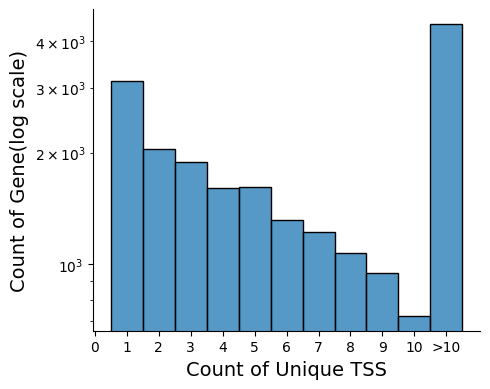

In [7]:
plt.figure(figsize=(5, 4))
sns.histplot(data = unique_counts_df, x='Binned Unique TSS Count')
plt.yscale('log')
plt.xlabel('Count of Unique TSS', fontsize=14)
plt.ylabel('Count of Gene(log scale)', fontsize=14)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.savefig(graph_pathout + "countOfTSS_v3.pdf", dpi=300, bbox_inches='tight')


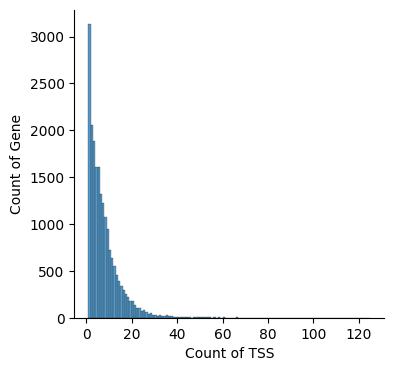

In [8]:
plt.figure(figsize=(4, 4))

sns.histplot(unique_counts_df, x = 'unique_count_tss', binwidth=1.)
plt.xlabel('Count of TSS')
plt.ylabel('Count of Gene')
sns.despine()
plt.savefig(graph_pathout + "countOfTSS.pdf", dpi=300, bbox_inches='tight')


In [9]:
unique_counts_df_2 = unique_counts_df[unique_counts_df['unique_count_tss'] == 2]
biomart_unique_counts_df_2= biomart_protein_coding[biomart_protein_coding['Gene stable ID'].isin(unique_counts_df_2['Gene stable ID'])].copy()
biomart_unique_counts_df_2 = biomart_unique_counts_df_2[['Gene stable ID', 'Transcription start site (TSS)']].drop_duplicates()
biomart_unique_counts_df_2['difference'] = abs(biomart_unique_counts_df_2.groupby('Gene stable ID')['Transcription start site (TSS)'].diff())
biomart_unique_counts_df_2_filtered = biomart_unique_counts_df_2.dropna(subset=['difference']).copy()


In [10]:
# Create custom bins
bins = list(range(0, 1001, 100))  # Up to 2000 in steps of 50
bins.append(float('inf'))  # Everything larger than 2000

# Create bin labels
labels = [f'[{bins[i]}, {bins[i+1]})' for i in range(len(bins) - 1)]
labels[-1] = f'[{bins[-2]}, inf)'  # Handle the last bin

# Bin the 'difference' column
biomart_unique_counts_df_2_filtered['difference_bins'] = pd.cut(biomart_unique_counts_df_2_filtered['difference'], bins=bins, labels=labels, right=False, include_lowest=True)
biomart_unique_counts_df_2_filtered

,Gene stable ID,Transcription start site (TSS),difference,difference_bins
675,ENSG00000172468,18546691,29.0,"[0, 100)"
686,ENSG00000176679,3579115,48.0,"[0, 100)"
918,ENSG00000099721,6872608,39144.0,"[1000, inf)"
1109,ENSG00000242389,21918032,10.0,"[0, 100)"
1441,ENSG00000172352,24048019,50.0,"[0, 100)"
...,...,...,...,...
276324,ENSG00000120332,175077419,9586.0,"[1000, inf)"
276335,ENSG00000116147,175406364,337231.0,"[1000, inf)"
276375,ENSG00000133059,205211702,136.0,"[100, 200)"
276575,ENSG00000286015,248745279,3070.0,"[1000, inf)"


In [11]:
biomart_unique_counts_df_2_filtered['difference_bins'].value_counts()

difference_bins
[1000, inf)    839
[0, 100)       791
[100, 200)     121
[200, 300)      70
[300, 400)      57
[400, 500)      38
[500, 600)      35
[900, 1000)     30
[700, 800)      28
[800, 900)      24
[600, 700)      19
Name: count, dtype: int64

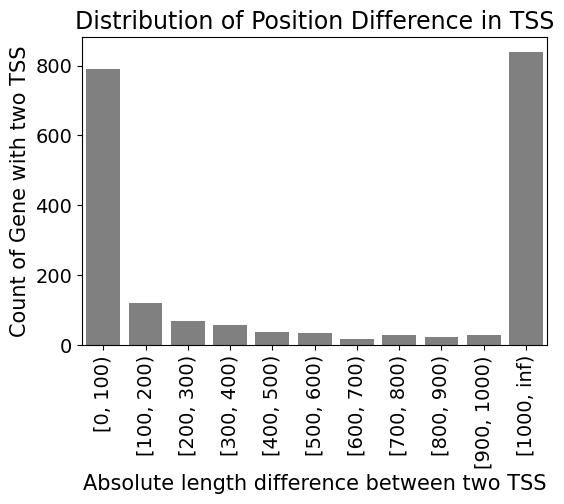

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='difference_bins', data=biomart_unique_counts_df_2_filtered, color = 'grey')

# Improving the aesthetics
plt.xticks(rotation=90)
plt.title('Distribution of Position Difference in TSS', fontsize = 17)
plt.xlabel('Absolute length difference between two TSS', fontsize = 15)
plt.ylabel('Count of Gene with two TSS', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(graph_pathout + "positionDifferenceTSS.pdf", dpi=300, bbox_inches='tight')
